In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [40]:
df  = pd.read_csv("C://Users//user//OneDrive//Desktop//income_evaluation.csv")

In [41]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [42]:
## DATA PRE-PROCESSING

#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()
##print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [23]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [43]:
df[df.duplicated(keep = 'last')] 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
7053,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [44]:
df = df.drop_duplicates(subset = None, keep ='first')

In [26]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1    workclass       32537 non-null  object
 2    fnlwgt          32537 non-null  int64 
 3    education       32537 non-null  object
 4    education-num   32537 non-null  int64 
 5    marital-status  32537 non-null  object
 6    occupation      32537 non-null  object
 7    relationship    32537 non-null  object
 8    race            32537 non-null  object
 9    sex             32537 non-null  object
 10   capital-gain    32537 non-null  int64 
 11   capital-loss    32537 non-null  int64 
 12   hours-per-week  32537 non-null  int64 
 13   native-country  32537 non-null  object
 14   income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [37]:
df.nunique()

age                   73
 workclass             9
 fnlwgt            21648
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        119
 capital-loss         92
 hours-per-week       94
 native-country       42
 income                2
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.occupation = le.fit_transform(df.occupation)
df['marital-status'] = le.fit_transform(df['marital-status'])
df['income'] = le.fit_transform(df['income'])



In [57]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,4,1,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,4,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,6,Not-in-family,White,Male,0,0,40,United-States,0


In [59]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

X=df[['occupation','marital-status','education-num']]
Y=df[['income']]

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [61]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [62]:
Y_pred = knn.predict(X_test)

In [63]:
confusion_matrix(Y_test, Y_pred)

array([[5576,  667],
       [ 886, 1006]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8090964966195452

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

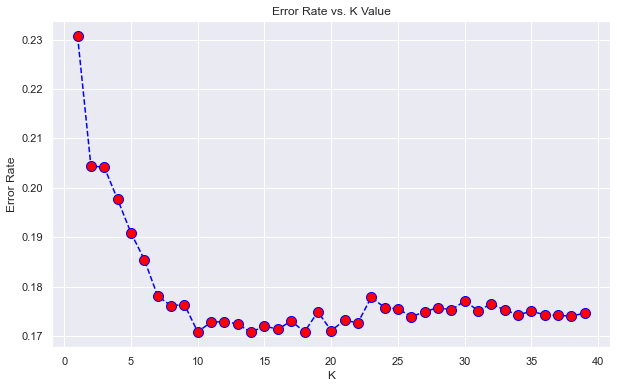

Minimum error:- 0.17074370006146278 at K = 14


In [65]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [66]:
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [67]:
Y_pred = knn.predict(X_test)

In [68]:
accuracy_score(Y_test, Y_pred)

0.8292562999385372

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
import graphviz

In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [71]:
X=df[['occupation','marital-status','education-num']]
Y=df[['income']]

In [72]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                     X,
                                                     Y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = Y
                                                    )

In [74]:
X_train.shape 
print()

X_test.shape  
print()

(22775, 3)

(9762, 3)

In [75]:
ct = dtree(
           criterion="gini",    
           max_depth=None      
           )

In [76]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [92]:
Y_pred = ct.predict(X_test)

In [93]:
len(Y_pred)

9762

In [94]:
len(Y_test)

9762

In [97]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8215529604589223


<Figure size 864x504 with 0 Axes>

[Text(402.64997504818285, 369.32823529411763, 'X[1] <= -0.074\ngini = 0.366\nsamples = 22775\nvalue = [17288, 5487]'),
 Text(208.7295636013216, 346.94470588235293, 'X[2] <= 0.94\ngini = 0.466\nsamples = 13612\nvalue = [8590, 5022]'),
 Text(113.29381883259913, 324.56117647058824, 'X[1] <= -1.402\ngini = 0.386\nsamples = 9830\nvalue = [7262, 2568]'),
 Text(43.30952643171806, 302.1776470588235, 'X[2] <= -0.226\ngini = 0.114\nsamples = 2515\nvalue = [2362, 153]'),
 Text(28.883259911894275, 279.7941176470588, 'X[0] <= 0.692\ngini = 0.085\nsamples = 1455\nvalue = [1390, 65]'),
 Text(18.436123348017624, 257.4105882352941, 'X[0] <= -0.254\ngini = 0.074\nsamples = 1136\nvalue = [1092, 44]'),
 Text(9.832599118942731, 235.0270588235294, 'X[0] <= -1.081\ngini = 0.104\nsamples = 688\nvalue = [650, 38]'),
 Text(4.4246696035242294, 212.6435294117647, 'X[0] <= -1.436\ngini = 0.048\nsamples = 327\nvalue = [319, 8]'),
 Text(1.9665198237885464, 190.26, 'X[2] <= -0.615\ngini = 0.077\nsamples = 75\nvalue =

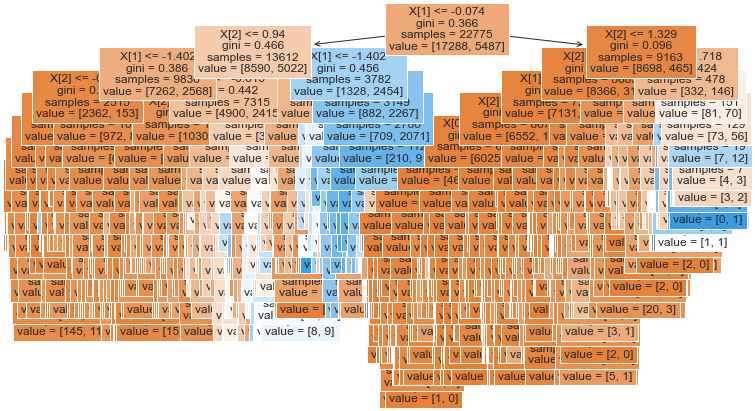

In [98]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(ct, filled=True, fontsize=12)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [100]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

C:\Users\user\AppData\Local\Temp/ipykernel_1344/1616795480.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestRegressor(random_state=1)

In [101]:
Yhat = model.predict(X_test)
print (Yhat)
# evaluate predictions
mae = mean_absolute_error(Y_test, Yhat)
print('MAE: %.3f' % mae)

[0.03004826 0.         0.58551886 ... 0.         0.00958379 0.07096583]
MAE: 0.236


In [102]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

C:\Users\user\AppData\Local\Temp/ipykernel_1344/117644506.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)


RandomForestClassifier()

In [103]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(Y_test, Y_pred)

0.8215529604589223

In [106]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index =['occupation','marital-status','education-num']).sort_values(ascending=False)
feature_imp

marital-status    0.491043
education-num     0.314179
occupation        0.194778
dtype: float64

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


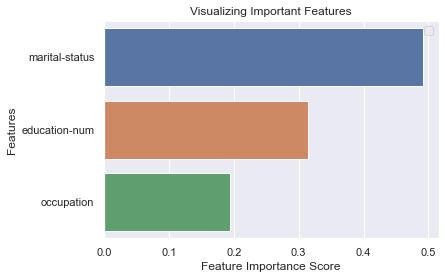

In [107]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [108]:
#Generating the Model on Selected Features
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=df[['marital-status','education-num']]  # Removed feature "occupation"
Y=df['income']                                       
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=5) # 70% training and 30% test

In [109]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

# prediction on test set
Y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

RandomForestClassifier()

Accuracy: 0.8164734808570425


In [ ]:
#KNN algo gives the highest accuracy